<a href="https://colab.research.google.com/github/lajmej/CursoGit2024/blob/master/Stylized_fact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font color = #000066 size=7> Métodos Cuantitativos en Finanzas - FC  </font>

<br><font color = #000000 size=6.5> Stylized Facts </font>

 <br><font color = silver size=5> Author: Luis Pavón, MSc, CQF </font>
 <br><font color = silver size=3> <luis_lept03@ciencias.unam.mx> </font>
 <br><font color = silver size=2> September,2022 </font>

***

In [ ]:
# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import yahoo finance library
import yfinance as yf

# Import cufflinks for visualization
import cufflinks as cf
cf.set_config_file(offline=True)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import scipy.stats for kurtosis, skew
from scipy.stats import kurtosis, skew

# Import scipy.stats for QQ-plot
from scipy import stats
import matplotlib.pyplot as plt

# Import scipy.stats for ACF
from statsmodels.graphics.tsaplots import plot_acf

/opt/anaconda3/lib/python3.9/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Data extraction

In [ ]:
# Fetch data by specifying the the start and end dates
df = yf.download('SPY', start='2008-01-01', end='2024-03-05', progress=False)

# Display the first five rows of the dataframe to check the results.
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,146.529999,146.990005,143.880005,144.929993,106.343765,204935600
2008-01-03,144.910004,145.490005,144.070007,144.860001,106.292358,125133300
2008-01-04,143.339996,143.440002,140.910004,141.309998,103.687561,232330900
2008-01-07,141.809998,142.229996,140.100006,141.190002,103.599518,234991000
2008-01-08,142.080002,142.899994,138.440002,138.910004,101.926529,326365700
...,...,...,...,...,...,...
2024-02-27,506.700012,507.160004,504.750000,506.929993,506.929993,48854500
2024-02-28,505.329987,506.859985,504.959991,506.260010,506.260010,56506600
2024-02-29,508.070007,509.739990,505.350006,508.079987,508.079987,83924800


In [ ]:
# Fetch data by specifying the the start and end dates
df = yf.download('SPY', start='2008-01-01', end='2022-09-12', progress=False)['Close']

# Display the first five rows of the dataframe to check the results.
df

Date
2008-01-02    144.929993
2008-01-03    144.860001
2008-01-04    141.309998
2008-01-07    141.190002
2008-01-08    138.910004
                 ...    
2022-09-02    392.239990
2022-09-06    390.760010
2022-09-07    397.779999
2022-09-08    400.380005
2022-09-09    406.600006
Name: Close, Length: 3699, dtype: float64

## Evolution: SPY

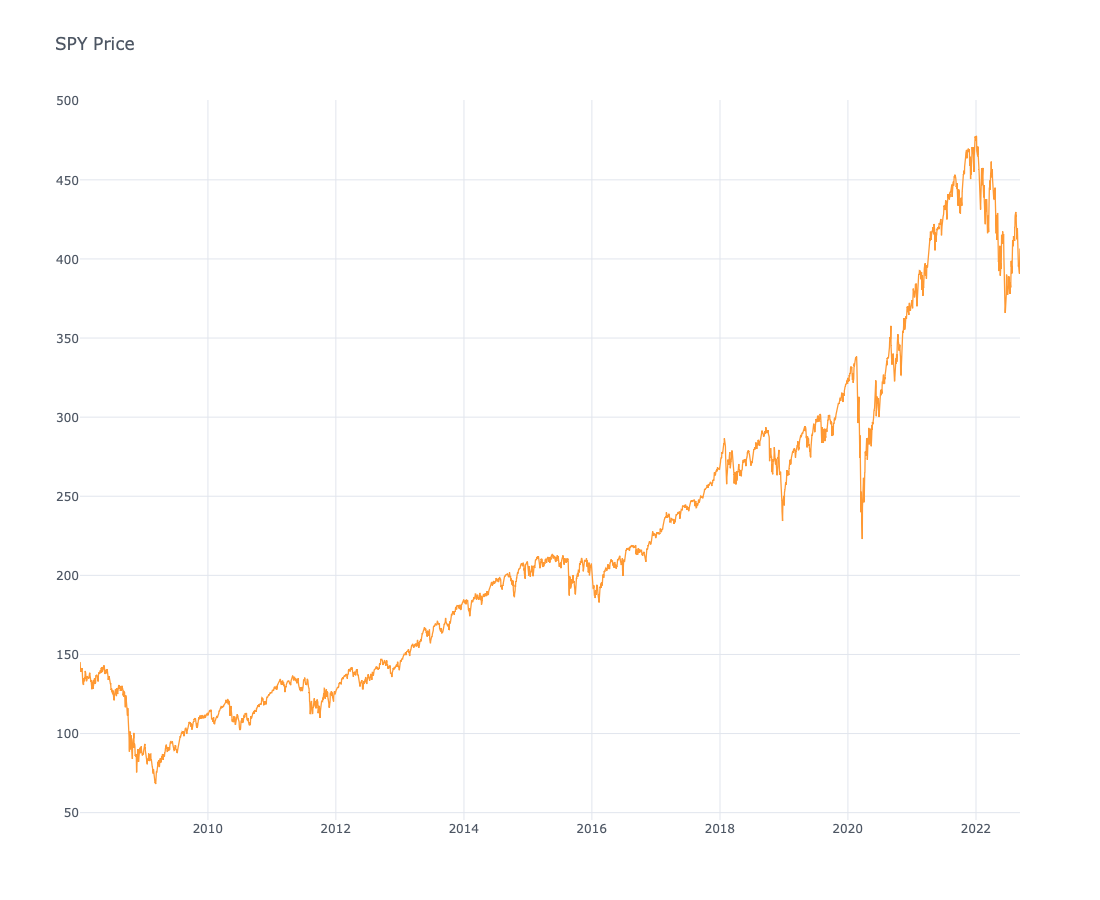

In [ ]:
df.iplot(kind='line',title='SPY Price')

In [ ]:
# Calculating Log Normal Returns

# Use numpy log function to derive log normal returns
daily_returns = np.log(df).diff().dropna()

# Display the last five rows of the data frame to check the output
daily_returns.head(5)

Date
2008-01-03   -0.000483
2008-01-04   -0.024812
2008-01-07   -0.000850
2008-01-08   -0.016280
2008-01-09    0.010455
Name: Close, dtype: float64

## Log-Return: SPY

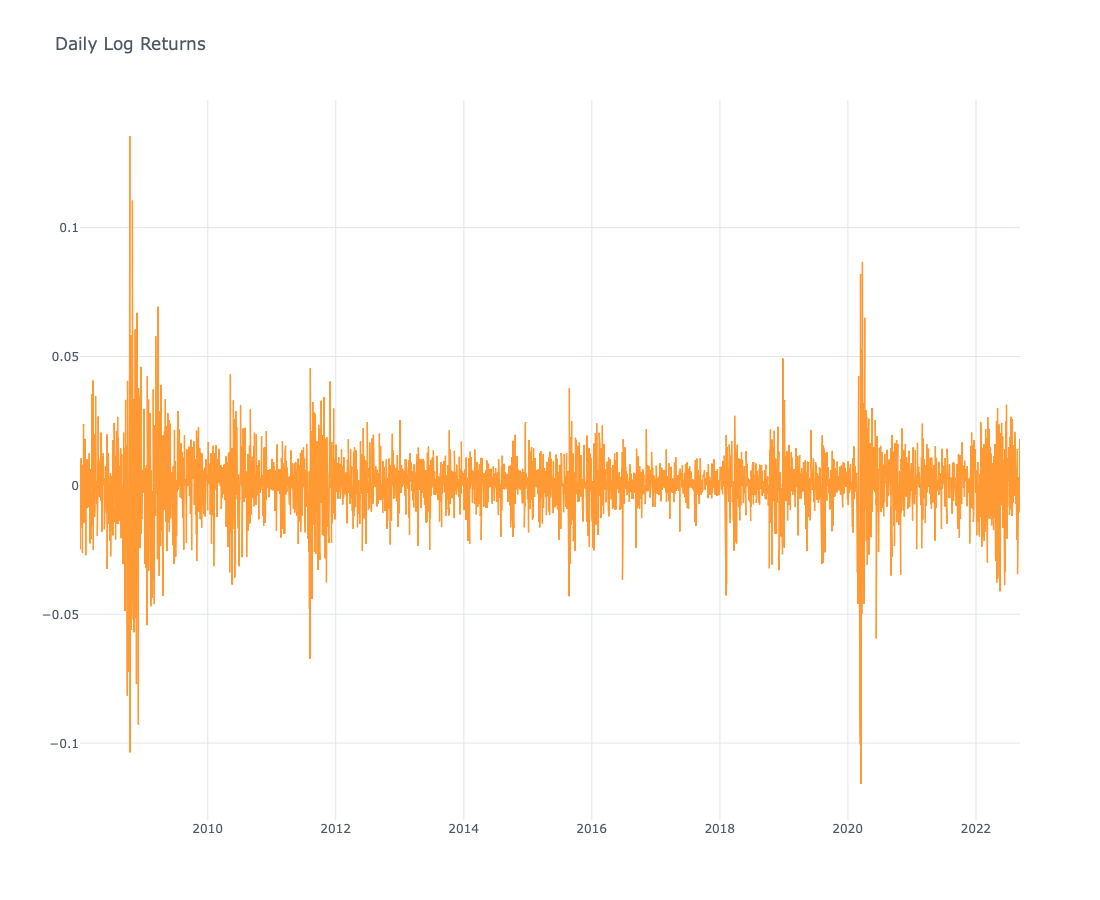

In [ ]:
# Plot Returns
daily_returns.iplot(title='Daily Log Returns')

## Histogram: SPY

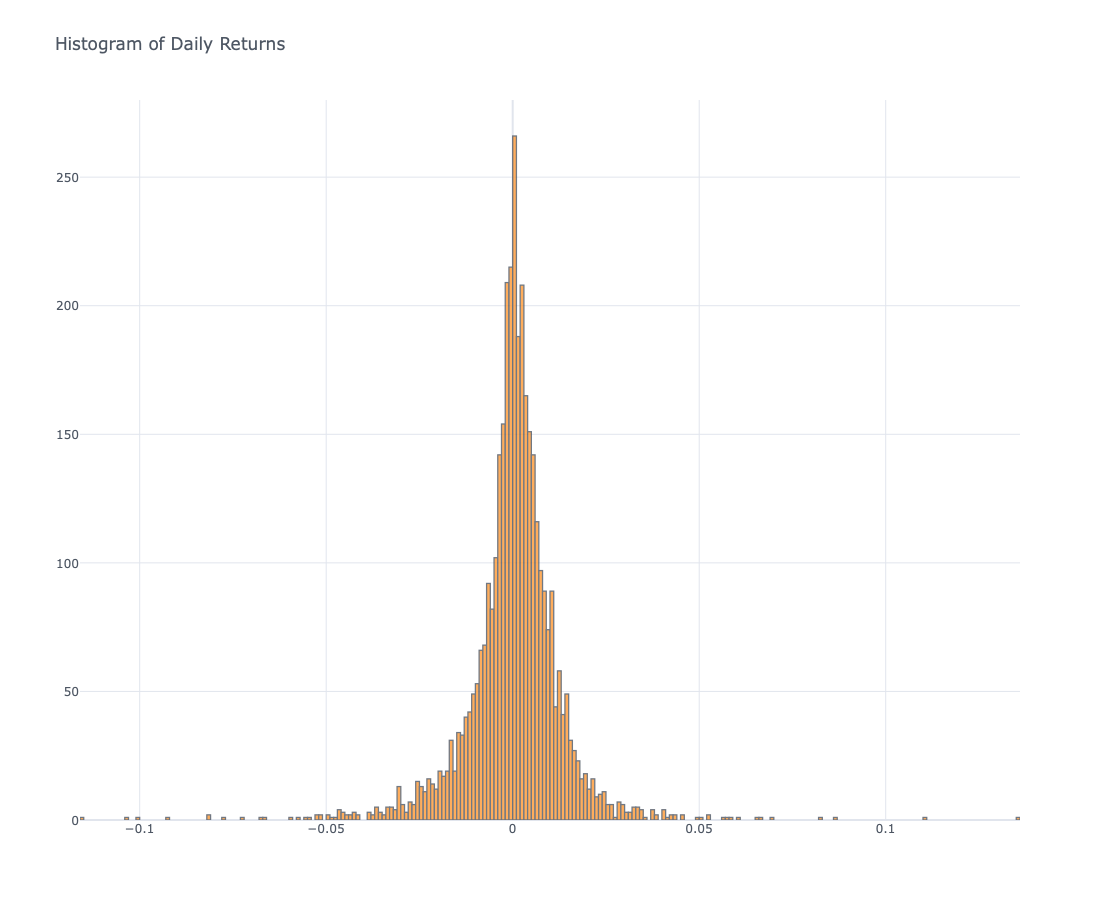

In [ ]:
# Plot log normal distribution of returns
daily_returns.iplot(kind='histogram', title = 'Histogram of Daily Returns')

## Moments: SPY

In [ ]:
# Compute mean, Standard deviation, and skew
# Kurtosis (If True, Fisher’s definition is used (normal ==> 0.0). If False, Pearson’s definition is used (normal ==> 3.0).)
pd.DataFrame({'Mean': round(np.mean(daily_returns),5),'SD': round(np.std(daily_returns),5),'Kurtosis':round(kurtosis(daily_returns,fisher=True),5),'Skew':round(skew(daily_returns),5)},index={'Statistics'})

,Mean,SD,Kurtosis,Skew
Statistics,0.00028,0.01305,13.58022,-0.37778


## QQ-Plot: SPY

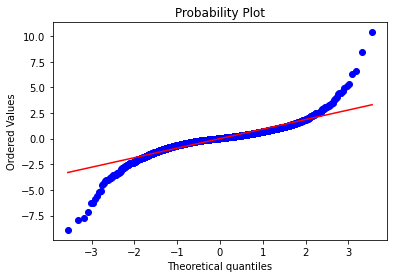

In [ ]:
stats.probplot((daily_returns-np.mean(daily_returns))/np.std(daily_returns), dist="norm", plot=plt)
plt.show()

## ACF: SPY

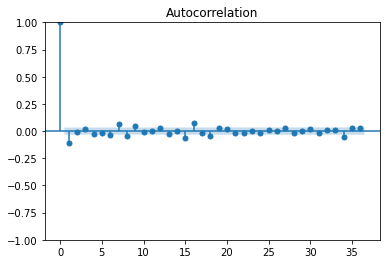

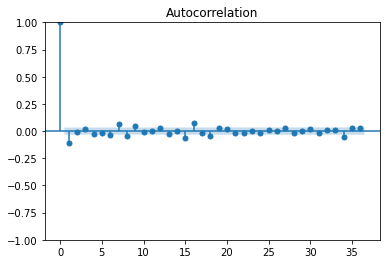

In [ ]:
# plot the auto correlation
plot_acf(daily_returns)

## ACF: Absolute-SPY

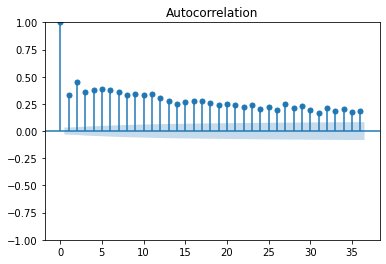

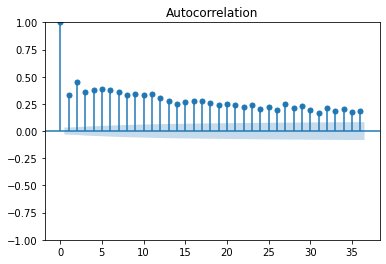

In [ ]:
# plot the auto correlation
plot_acf(np.abs(daily_returns))

## Re-Sampling: SPY

In [ ]:
# Resampling to derive weekly values from daily time series
df_weekly = df.resample('W').last()

# Display the last five rows of the data frame to check the output
df_weekly

Date
2008-01-06    141.309998
2008-01-13    140.149994
2008-01-20    132.059998
2008-01-27    133.039993
2008-02-03    139.580002
                 ...    
2022-08-14    427.100006
2022-08-21    422.140015
2022-08-28    405.309998
2022-09-04    392.239990
2022-09-11    406.600006
Freq: W-SUN, Name: Close, Length: 767, dtype: float64

In [ ]:
# Resampling to derive monthly values from daily time series
df_monthly = df.resample('M').last()

# Display the last five rows of the data frame to check the output
df_monthly

Date
2008-01-31    137.369995
2008-02-29    133.820007
2008-03-31    131.970001
2008-04-30    138.259995
2008-05-31    140.350006
                 ...    
2022-05-31    412.929993
2022-06-30    377.250000
2022-07-31    411.989990
2022-08-31    395.179993
2022-09-30    406.600006
Freq: M, Name: Close, Length: 177, dtype: float64

In [ ]:
# Resampling to a specific day of the week: Thursday
df_weekly_thu = df.resample('W-THU').ffill()

# Display the last five rows of the data frame to check the output
df_weekly_thu.tail()

Date
2022-08-18    427.890015
2022-08-25    419.510010
2022-09-01    396.420013
2022-09-08    400.380005
2022-09-15    406.600006
Freq: W-THU, Name: Close, dtype: float64